In [1]:
import numpy as np
from gym.spaces.discrete import Discrete
from gym_sokoban.envs import SokobanEnv
from stable_baselines3 import DQN
from stable_baselines3.dqn.policies import CnnPolicy
from stable_baselines3.common.callbacks import EvalCallback
import matplotlib.pyplot as plt

In [3]:
class SokobanEnvFixated(SokobanEnv): 
    def __init__(self):
        SokobanEnv.__init__(self,
                            dim_room=(10, 10), 
                            max_steps=40, 
                            num_boxes=4, 
                            num_gen_steps=None, 
                            reset=False)
        self.action_space = Discrete(5) # limit to push actions

    def reset(self, second_player=False, render_mode='rgb_array'):

        self.room_fixed = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    [0, 1, 1, 1, 1, 2, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 2, 1, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 0, 1, 1, 2, 1, 0],
                                    [0, 2, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.room_state = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    [0, 1, 1, 4, 5, 2, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 2, 4, 1, 4, 1, 0],
                                    [0, 1, 1, 1, 0, 1, 1, 2, 1, 0],
                                    [0, 2, 4, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.box_mapping = {(6, 7): (5, 7), (5, 4): (5, 5), (4, 5): (4, 3), (7, 1): (7, 2)}

        self.player_position = np.argwhere(self.room_state == 5)[0]
        self.num_env_steps = 0
        self.reward_last = 0
        self.boxes_on_target = 0

        starting_observation = self.render(render_mode)
        return starting_observation # Close environment after testing

def render_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    image = env.render(mode)

    plt.figure(dpi=200) 
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
env = SokobanEnvFixated()
test_env = SokobanEnvFixated()

# Define the A2C model
model = DQN(CnnPolicy, 
            env, 
            tensorboard_log="./tensorboard_logs/",
            learning_starts=1000,
            buffer_size=100000,
            exploration_fraction=0.5,
            verbose=1)

eval_callback = EvalCallback(test_env, 
                             best_model_save_path='./models/',
                             eval_freq=500,
                             deterministic=True,
                             render=False)

# Train the model
model.learn(total_timesteps=1000000,
            callback=eval_callback,
            tb_log_name="log_sokoban_dqn_fixated_env_1")
env.close()

# Run TensorBoard
# In the terminal, run: tensorboard --logdir=./03_resource/03_DRL/tensorboard_logs/

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


c:\Users\roger\Documents\Projekte\vm-code-generation-with-knowledge-graph\venv\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\roger\Documents\Projekte\vm-code-generation-with-knowledge-graph\venv\lib\site-packages\stable_baselines3\common\buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 15.36GB > 5.61GB
  warnings.warn(


Logging to ./tensorboard_logs/log_sokoban_dqn_fixated_env_8


c:\Users\roger\Documents\Projekte\vm-code-generation-with-knowledge-graph\venv\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\roger\Documents\Projekte\vm-code-generation-with-knowledge-graph\venv\lib\site-packages\stable_baselines3\common\callbacks.py:418: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.vec_transpose.VecTransposeImage object at 0x00000235B61840A0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x00000235831485B0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | -4       |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 4        |
|    fps              | 62       |
|    time_elapsed     | 2        |
|    total_timesteps  | 160      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | -3.75    |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 66       |
|    time_elapsed     | 4        |
|    total_timesteps  | 320      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | -3.75    |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes       

c:\Users\roger\Documents\Projekte\vm-code-generation-with-knowledge-graph\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=500, episode_reward=-4.00 +/- 0.00
Episode length: 40.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 40       |
|    mean_reward      | -4       |
| rollout/            |          |
|    exploration_rate | 0.999    |
| time/               |          |
|    total_timesteps  | 500      |
----------------------------------
New best mean reward!
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | -3.75    |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 43       |
|    time_elapsed     | 14       |
|    total_timesteps  | 640      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | -3.8     |
|    exploration_rate | 0.998    |
| time/           

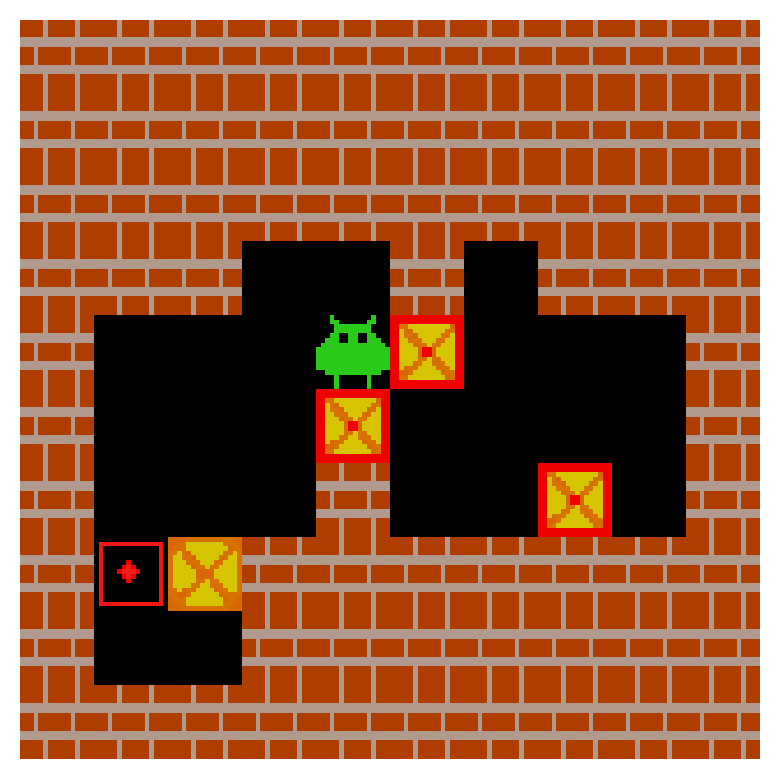

In [ ]:
# Load the trained model
model = DQN.load("./models/model_sokoban_dqn_fixated_env_1")

# Create test enviroment
test_env = SokobanEnvFixated()

# Run the model in the test environment
obs = test_env.reset()
done = False
while not done:
    action, _states = model.predict(obs, deterministic = True)  # Get action from model
    obs, reward, done, info = test_env.step(int(action))  # Apply action

render_state(test_env)
test_env.close() 